# Ibotta Fouthbrain Partner Project

The Ibotta Fourthbrain Partner Project relies on working with the Berka Dataset, which is a financial dataset containing anonymized information about clients of a Czech bank, accounts, transactions and related information. 


## The objective

One of the issues about banking services involves loans, because a bank doesn't want to lend money to clients that won't be able to pay back the loan, hence the bank wants to avoid such situations by issuing loans only to 'good clients'. In order to accomplish this, we will be trying to design and develop a model to understand whether a client is a good or bad one according to their information and behaviour inside the very same bank, stored as available data into the Berka Dataset.

The data analysis will be used to get more insights regarding patterns about data to be exploited to build a solid model that will let us understand whether a loan is more likely to be repayed by the specific client or not. The path to be followed will split into a crossroad. We will be analyzing:
* **STATIC DATA** about the client, involving personal details like linked clients, client details and demographics.
* **DYNAMIC DATA** about the client, including orders and transactions and credit cards that the owner of the account requests. 

For this reason, the dataset was queried accordingly to split such information and analyze each separately. 

In [7]:
import pandas as pd
import numpy as np

from IPython.display import Image 

## Static data analysis

Let's take a look at the extracted view of the database corresponding to the static information of the clients:


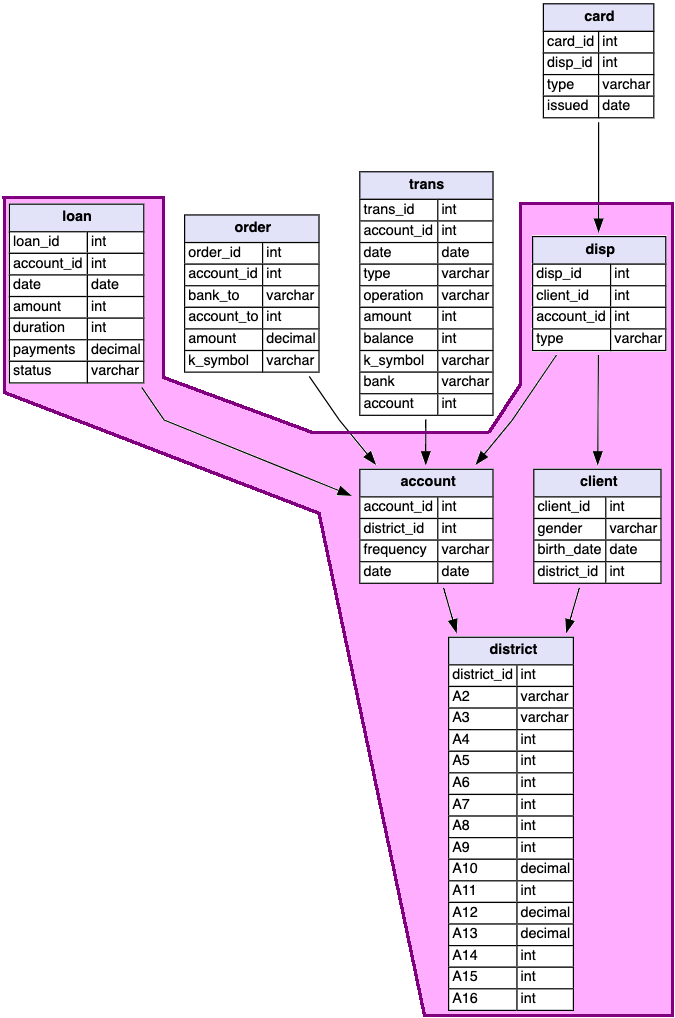

In [8]:
display(Image(filename='imgs/loan_and_clients.png'))

In [9]:
static_df = pd.read_csv('loans_and_clients.csv', index_col='client_id')
static_df

,account_id,district_id,frequency,date,disp_id,account_id.1,type,client_id.1,gender,birth_date,...,A14,A15,A16,loan_id,account_id.2,date.1,amount,duration,payments,status
client_id,,,,,,,,,,,,,,,,,,,,,
2,2,1,POPLATEK MESICNE,1993-02-26,2,2,OWNER,2,M,1945-02-04,...,167,85677.0,99107,4959,2,1994-01-05,80952,24,3373.0,A
3,2,1,POPLATEK MESICNE,1993-02-26,3,2,DISPONENT,3,F,1940-10-09,...,167,85677.0,99107,4959,2,1994-01-05,80952,24,3373.0,A
25,19,21,POPLATEK MESICNE,1995-04-07,25,19,OWNER,25,F,1939-04-23,...,123,2299.0,2354,4961,19,1996-04-29,30276,12,2523.0,B
31,25,68,POPLATEK MESICNE,1996-07-28,31,25,OWNER,31,M,1962-02-09,...,96,5623.0,5887,4962,25,1997-12-08,30276,12,2523.0,A
45,37,20,POPLATEK MESICNE,1997-08-18,45,37,OWNER,45,M,1952-08-26,...,120,1563.0,1542,4967,37,1998-10-14,318480,60,5308.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13924,11328,54,POPLATEK MESICNE,1996-11-05,13616,11328,OWNER,13924,F,1952-09-09,...,140,18721.0,18696,7295,11328,1998-07-18,280440,60,4674.0,C
13955,11349,1,POPLATEK TYDNE,1995-05-26,13647,11349,OWNER,13955,F,1945-10-30,...,167,85677.0,99107,7304,11349,1995-10-29,419880,60,6998.0,C
13956,11349,1,POPLATEK TYDNE,1995-05-26,13648,11349,DISPONENT,13956,M,1943-04-06,...,167,85677.0,99107,7304,11349,1995-10-29,419880,60,6998.0,C


In [10]:
cols = np.array(static_df.columns)
print(f'The loan_and_clients view has {len(cols)} columns: {cols}')

The loan_and_clients view has 34 columns: ['account_id' 'district_id' 'frequency' 'date' 'disp_id' 'account_id.1'
 'type' 'client_id.1' 'gender' 'birth_date' 'district_id.1'
 'district_id.2' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12'
 'A13' 'A14' 'A15' 'A16' 'loan_id' 'account_id.2' 'date.1' 'amount'
 'duration' 'payments' 'status']


As we can see, there are several columns that might be redundant, due to the inner join operations on the database. Let's **REMOVE REDUNDANCIES** by checking that the corresponding values are equal and remove the district_ids because we can have directly the district values:

In [11]:
if (static_df['account_id']==static_df['account_id.1']).all():
    static_df = static_df.drop(columns=['account_id.1'])
if (static_df.index==static_df['client_id.1']).all():
    static_df = static_df.drop(columns=['client_id.1'])
if (static_df['district_id.1']==static_df['district_id.2']).all():
    static_df = static_df.drop(columns=['district_id.2'])
if (static_df['account_id']==static_df['account_id.2']).all():
    static_df = static_df.drop(columns=['account_id.2'])


In [12]:
static_df = static_df.drop(columns=['district_id', 'district_id.1'])

We're going to **RENAME THE COLUMNS** as well to make each field easily understandable at sight:

In [13]:
renamed_cols = [
    'acc_id', 'acc_frequency', 'acc_date', 
    'disp_id', 'disp_type',
    'cl_gender', 'cl_birth',
    'dstr_name', 'dstr_region', 'dstr_inhab', 'dstr_munic1', 'dstr_munic2', 'dstr_munic3', 'dstr_munic4', 'dstr_cit', 'dstr_ratio_urb_inhab', 'dstr_avg_sal', 'dstr_unemp_1995', 'dstr_unemp_1996', 'dstr_enterpr', 'dstr_crimes_1995', 'dstr_crimes_1996',
    'loan_id', 'loan_date', 'loan_amount', 'loan_duration', 'loan_payments', 'loan_status'
]
static_df.columns = renamed_cols
static_df.head()


,acc_id,acc_frequency,acc_date,disp_id,disp_type,cl_gender,cl_birth,dstr_name,dstr_region,dstr_inhab,...,dstr_unemp_1996,dstr_enterpr,dstr_crimes_1995,dstr_crimes_1996,loan_id,loan_date,loan_amount,loan_duration,loan_payments,loan_status
client_id,,,,,,,,,,,,,,,,,,,,,
2,2,POPLATEK MESICNE,1993-02-26,2,OWNER,M,1945-02-04,Hl.m. Praha,Prague,1204953,...,0.43,167,85677.0,99107,4959,1994-01-05,80952,24,3373.0,A
3,2,POPLATEK MESICNE,1993-02-26,3,DISPONENT,F,1940-10-09,Hl.m. Praha,Prague,1204953,...,0.43,167,85677.0,99107,4959,1994-01-05,80952,24,3373.0,A
25,19,POPLATEK MESICNE,1995-04-07,25,OWNER,F,1939-04-23,Tabor,south Bohemia,103347,...,2.07,123,2299.0,2354,4961,1996-04-29,30276,12,2523.0,B
31,25,POPLATEK MESICNE,1996-07-28,31,OWNER,M,1962-02-09,Frydek - Mistek,north Moravia,228848,...,4.72,96,5623.0,5887,4962,1997-12-08,30276,12,2523.0,A
45,37,POPLATEK MESICNE,1997-08-18,45,OWNER,M,1952-08-26,Strakonice,south Bohemia,70646,...,3.64,120,1563.0,1542,4967,1998-10-14,318480,60,5308.0,D


Before going into the analysis, we need to do a bit of data wrangling in order to prepare the data. To be ready we need to address each field type differently. First let's check for **TYPES AND NULL VALUES** for each column:

In [14]:
static_df.iloc[0,:]

acc_id                                 2
acc_frequency           POPLATEK MESICNE
acc_date                      1993-02-26
disp_id                                2
disp_type                          OWNER
cl_gender                              M
cl_birth                      1945-02-04
dstr_name                    Hl.m. Praha
dstr_region                       Prague
dstr_inhab                       1204953
dstr_munic1                            0
dstr_munic2                            0
dstr_munic3                            0
dstr_munic4                            1
dstr_cit                               1
dstr_ratio_urb_inhab               100.0
dstr_avg_sal                       12541
dstr_unemp_1995                      0.2
dstr_unemp_1996                     0.43
dstr_enterpr                         167
dstr_crimes_1995                 85677.0
dstr_crimes_1996                   99107
loan_id                             4959
loan_date                     1994-01-05
loan_amount     

In [15]:
for i, col in enumerate(static_df.columns):
    column_number = i
    column_name = col
    non_null_count = static_df[column_name].notnull().sum()
    dtype = static_df[column_name].dtype
    print(f'{column_number} -> {column_name} -> {non_null_count} ({dtype})')
  

0 -> acc_id -> 827 (int64)
1 -> acc_frequency -> 827 (object)
2 -> acc_date -> 827 (object)
3 -> disp_id -> 827 (int64)
4 -> disp_type -> 827 (object)
5 -> cl_gender -> 827 (object)
6 -> cl_birth -> 827 (object)
7 -> dstr_name -> 827 (object)
8 -> dstr_region -> 827 (object)
9 -> dstr_inhab -> 827 (int64)
10 -> dstr_munic1 -> 827 (int64)
11 -> dstr_munic2 -> 827 (int64)
12 -> dstr_munic3 -> 827 (int64)
13 -> dstr_munic4 -> 827 (int64)
14 -> dstr_cit -> 827 (int64)
15 -> dstr_ratio_urb_inhab -> 827 (float64)
16 -> dstr_avg_sal -> 827 (int64)
17 -> dstr_unemp_1995 -> 818 (float64)
18 -> dstr_unemp_1996 -> 827 (float64)
19 -> dstr_enterpr -> 827 (int64)
20 -> dstr_crimes_1995 -> 818 (float64)
21 -> dstr_crimes_1996 -> 827 (int64)
22 -> loan_id -> 827 (int64)
23 -> loan_date -> 827 (object)
24 -> loan_amount -> 827 (int64)
25 -> loan_duration -> 827 (int64)
26 -> loan_payments -> 827 (float64)
27 -> loan_status -> 827 (object)


Both 'dstr_crimes_1995' and 'dstr_unemp_1995' columns exhibit 9 null values each. We're going to replace these null values with the same values that are reported in the 1996 year for each corresponding column, as to say that unemployment and crime rate hasn't changed between consecutive years. 

In [16]:
static_df['dstr_crimes_1995'] = static_df.apply(
    lambda row: row['dstr_crimes_1996'] if np.isnan(row['dstr_crimes_1995']) else row['dstr_crimes_1995'],
    axis=1
)
static_df['dstr_unemp_1995'] = static_df.apply(
    lambda row: row['dstr_unemp_1996'] if np.isnan(row['dstr_unemp_1995']) else row['dstr_unemp_1995'],
    axis=1
)


Let's preprocess **DATE TYPES**. Three fields share the 'date' type, namely:
* 'acc_date', which indicates when the account was created. It represents the day 0 for the client inside the bank.
* 'cl_birth', which indicates the client date of birth. We can take track of the age, given that this piece of data was published with the PKDD'99 challenge, in 1999.
* 'loan_date', which indicates when the loan was requested from the client. The loan date may be relevant in reference to when the account was created, so we can keep track of the difference between the two in terms of elapsed days. 

In [17]:
from datetime import datetime

static_df['loan_date'] = static_df['loan_date'].astype('datetime64')
static_df['acc_date'] = static_df['acc_date'].astype('datetime64')

static_df.insert(
    static_df.columns.get_loc('loan_date'), 
    'days_after_loan', 
    (static_df['loan_date'] - static_df['acc_date']).dt.days
)

static_df.insert(
    static_df.columns.get_loc('cl_birth'),
    'cl_age',
    static_df['cl_birth'].map(lambda date: 1999 - int(date.split('-')[0]))
)

static_df = static_df.drop(columns=['loan_date', 'acc_date', 'cl_birth'])

print(static_df.columns.values)
len(static_df.columns)

['acc_id' 'acc_frequency' 'disp_id' 'disp_type' 'cl_gender' 'cl_age'
 'dstr_name' 'dstr_region' 'dstr_inhab' 'dstr_munic1' 'dstr_munic2'
 'dstr_munic3' 'dstr_munic4' 'dstr_cit' 'dstr_ratio_urb_inhab'
 'dstr_avg_sal' 'dstr_unemp_1995' 'dstr_unemp_1996' 'dstr_enterpr'
 'dstr_crimes_1995' 'dstr_crimes_1996' 'loan_id' 'days_after_loan'
 'loan_amount' 'loan_duration' 'loan_payments' 'loan_status']


27

Let's preprocess **CATEGORICAL TYPES**. Six fields share the 'categorical' type, namely:
* acc_frequency, which indicates the frequency of the client receiving his/her bank statements. Unpaid loans can be influenced by the account frequency of statement issuance, given by 'acc_frequency', which can assume three possible values and we're going to transform it to a one-hot numerical feature.
* disp_type, which indicates whether an account is handled by one client (OWNER) or two (OWNER and DISPONENT). Each row entry is associated to at least one owner and sometimes (s)he shares it with a disponent (another person, probably the partner consort). We can deal with it simply by removing all the 'disponent' rows and add a column telling us whether the owner shares his account with a disponent or not. After this operation, we can remove the disp_type and disp_id feature as well.
* cl_gender, gender of the client. The gender can be transformed in a one-hot numerical feature [**BIAS_WARNING**]. 
* dstr_name, which indicates the name of the district the account/client belongs to. Poor districts may have prevalence of people who are not willing to pay loans back. We're going to transform 'dstr_name' and 'dstr_region' into two one-hot numerical features [**BIAS_WARNING**].
* dstr_region, which indicates the name of the region for the corresponding district name. See previous bullet [**BIAS_WARNING**].
* loan_status, which indicates past (A and B) and current loans (C and D) associated to an account. It is the label of the classification task. In order to predict the positive outcome from a loan and the negative one, we're going to binarize this column as A,C values are the positive ones and B,D values are the negative ones.


In [18]:
static_df['acc_frequency'] = static_df['acc_frequency'].map({
    'POPLATEK MESICNE': 'monthly_issuance',
    'POPLATEK TYDNE': 'weekly_issuance',
    'POPLATEK PO OBRATU': 'issuance_after_transaction'
})

for field_name in ['acc_frequency', 'cl_gender', 'dstr_name', 'dstr_region']:
    one_hot = pd.get_dummies(static_df[field_name], prefix=field_name)
    for column in one_hot.columns:
        static_df.insert(
            static_df.columns.get_loc(field_name),
            column.lower(),
            one_hot[column]
        )
    static_df = static_df.drop(columns=[field_name])

In [19]:
field_name = 'disp_type'
static_df2 = static_df[static_df[field_name]=='OWNER']
static_df2.insert(
    static_df.columns.get_loc(field_name),
    'cl_has_disp',
    (static_df[['acc_id', field_name]].groupby(by='acc_id').count()-1)[field_name].values
)
static_df = static_df2
static_df = static_df.drop(columns=[field_name, 'disp_id'])


In [20]:
static_df['loan_status'] = static_df['loan_status'].map({
    'A': 0,
    'B': 1, 
    'C': 0,
    'D': 1
})

In [21]:
print(static_df.columns.values)
static_df.shape

['acc_id' 'acc_frequency_issuance_after_transaction'
 'acc_frequency_monthly_issuance' 'acc_frequency_weekly_issuance'
 'cl_has_disp' 'cl_gender_f' 'cl_gender_m' 'cl_age' 'dstr_name_benesov'
 'dstr_name_beroun' 'dstr_name_blansko' 'dstr_name_breclav'
 'dstr_name_brno - mesto' 'dstr_name_brno - venkov' 'dstr_name_bruntal'
 'dstr_name_ceska lipa' 'dstr_name_ceske budejovice'
 'dstr_name_cesky krumlov' 'dstr_name_cheb' 'dstr_name_chomutov'
 'dstr_name_chrudim' 'dstr_name_decin' 'dstr_name_domazlice'
 'dstr_name_frydek - mistek' 'dstr_name_havlickuv brod'
 'dstr_name_hl.m. praha' 'dstr_name_hodonin' 'dstr_name_hradec kralove'
 'dstr_name_jablonec n. nisou' 'dstr_name_jesenik' 'dstr_name_jicin'
 'dstr_name_jihlava' 'dstr_name_jindrichuv hradec'
 'dstr_name_karlovy vary' 'dstr_name_karvina' 'dstr_name_kladno'
 'dstr_name_klatovy' 'dstr_name_kolin' 'dstr_name_kromeriz'
 'dstr_name_kutna hora' 'dstr_name_liberec' 'dstr_name_litomerice'
 'dstr_name_louny' 'dstr_name_melnik' 'dstr_name_mlada bol

(682, 112)

In [22]:
static_df.columns = [col.upper() for col in static_df.columns]
static_features = static_df.iloc[:,:-1].values
static_labels = static_df.iloc[:,-1].values
all_features = static_df.columns.values[:-1]
len(all_features)

111

Let's print the statistics to understand whether there are the **CORRELATED FEATURES**, so that we can eliminate highly correlated ones. We're going to use three techniques: the Pearson correlation matrix, the p-value significance and the cross-validated lasso feature importance.  

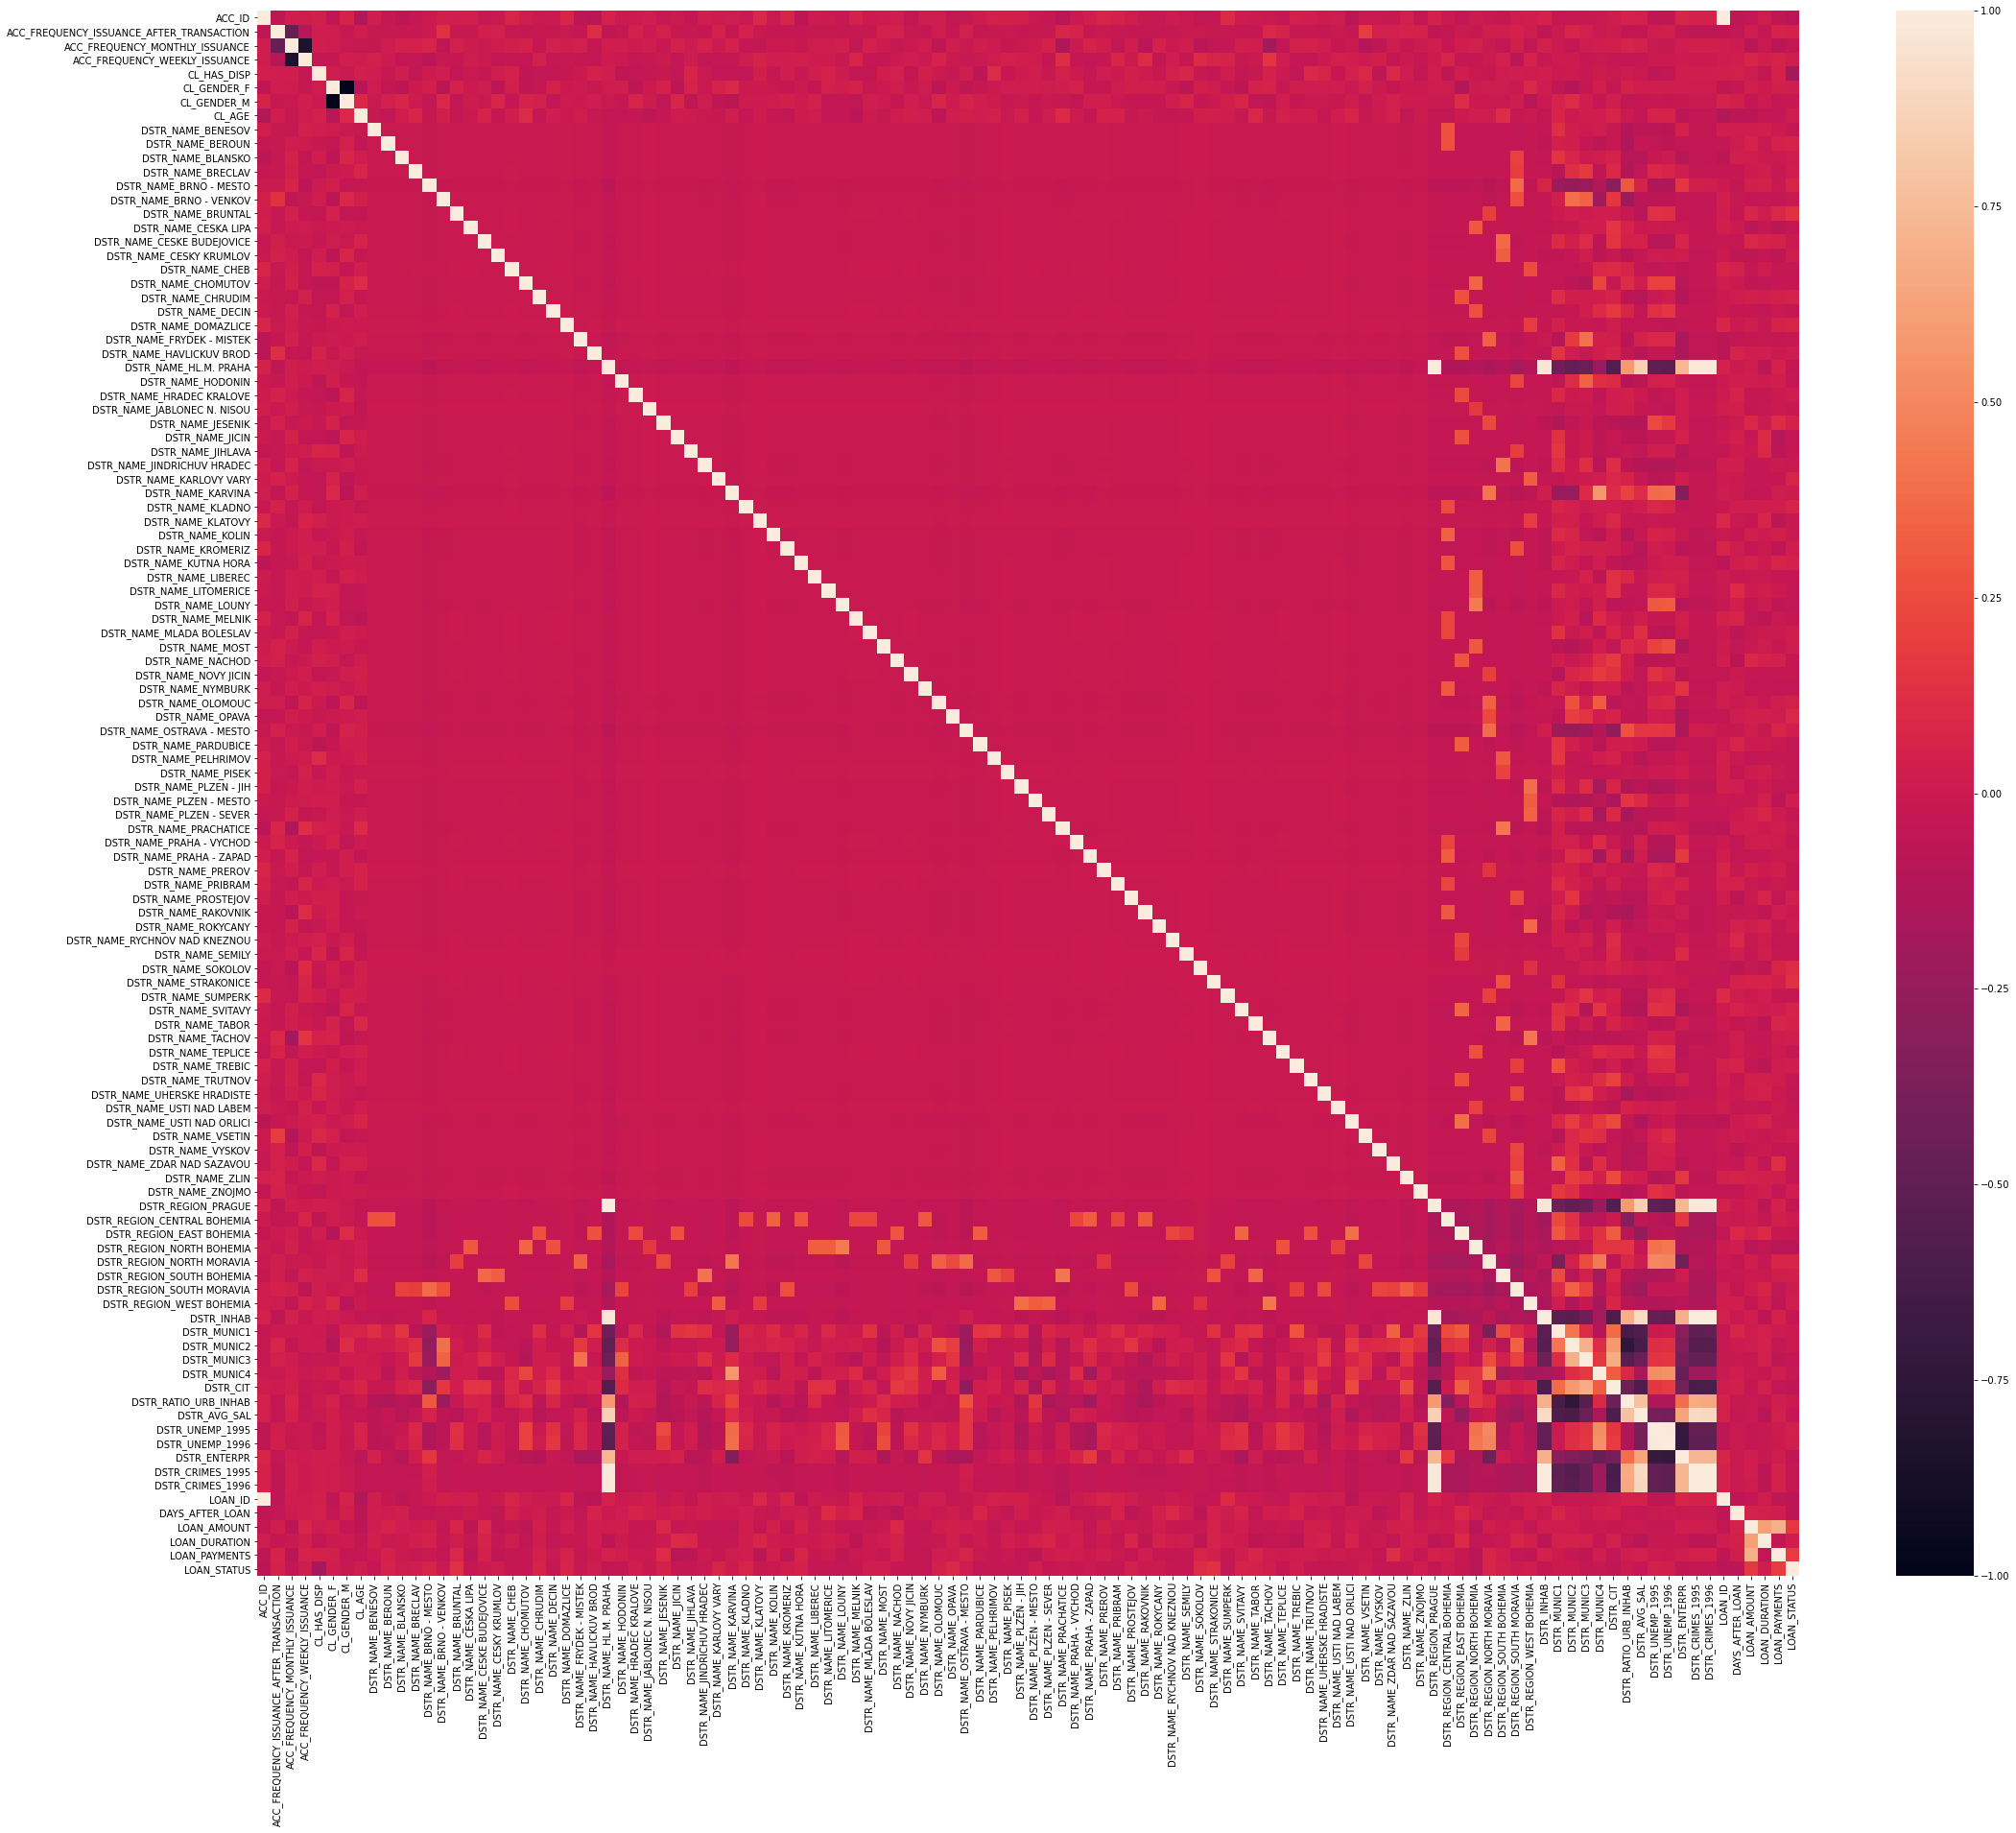

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(36,30))
cor = static_df.corr(method='pearson')
sns.heatmap(cor)
plt.show()

In [24]:
pearson_threshold = 0.7
keep_columns = list(range(len(all_features)))
for i in keep_columns[:-1]:
    for j in keep_columns[i+1:]:
        if np.abs(cor.iloc[i,j]) >= pearson_threshold:
            if j in keep_columns:
                keep_columns.remove(j)

pearson_selected_columns = all_features[keep_columns]
pearson_candidate_columns_for_removal = set(all_features).difference(pearson_selected_columns)

print(f'According to the PEARSON CORRELATION MATRIX (threshold: {pearson_threshold}), the following columns are candidate for removal:')
print('\n', list(pearson_candidate_columns_for_removal))
print('\n', len(pearson_candidate_columns_for_removal), '/', len(all_features))
print('\n')
print(f'According to the PEARSON CORRELATION MATRIX (threshold: {pearson_threshold}), the following columns are candidate for selection:')
print('\n', list(pearson_selected_columns))
print('\n', len(pearson_selected_columns), '/', len(all_features))



According to the PEARSON CORRELATION MATRIX (threshold: 0.7), the following columns are candidate for removal:

 ['DSTR_REGION_PRAGUE', 'ACC_FREQUENCY_WEEKLY_ISSUANCE', 'DSTR_CRIMES_1995', 'DSTR_AVG_SAL', 'LOAN_ID', 'DSTR_RATIO_URB_INHAB', 'DSTR_INHAB', 'DSTR_ENTERPR', 'DSTR_CRIMES_1996']

 9 / 111


According to the PEARSON CORRELATION MATRIX (threshold: 0.7), the following columns are candidate for selection:

 ['ACC_ID', 'ACC_FREQUENCY_ISSUANCE_AFTER_TRANSACTION', 'ACC_FREQUENCY_MONTHLY_ISSUANCE', 'CL_HAS_DISP', 'CL_GENDER_F', 'CL_GENDER_M', 'CL_AGE', 'DSTR_NAME_BENESOV', 'DSTR_NAME_BEROUN', 'DSTR_NAME_BLANSKO', 'DSTR_NAME_BRECLAV', 'DSTR_NAME_BRNO - MESTO', 'DSTR_NAME_BRNO - VENKOV', 'DSTR_NAME_BRUNTAL', 'DSTR_NAME_CESKA LIPA', 'DSTR_NAME_CESKE BUDEJOVICE', 'DSTR_NAME_CESKY KRUMLOV', 'DSTR_NAME_CHEB', 'DSTR_NAME_CHOMUTOV', 'DSTR_NAME_CHRUDIM', 'DSTR_NAME_DECIN', 'DSTR_NAME_DOMAZLICE', 'DSTR_NAME_FRYDEK - MISTEK', 'DSTR_NAME_HAVLICKUV BROD', 'DSTR_NAME_HL.M. PRAHA', 'DSTR_NAME_HODON

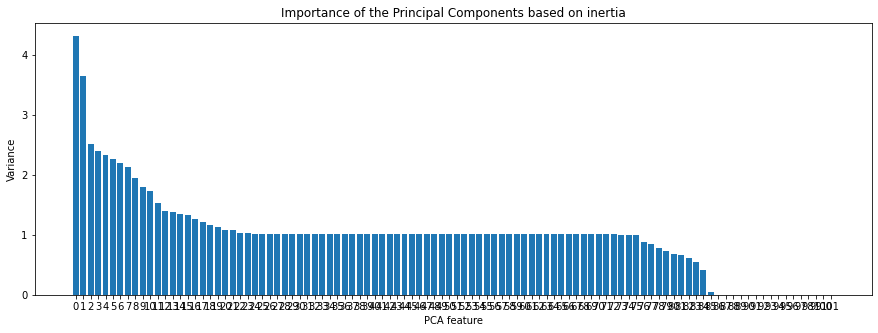

In [26]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(static_df[pearson_selected_columns])

features = range(pca.n_components_)
plt.figure(figsize=(15,5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title('Importance of the Principal Components based on inertia')
plt.show()

In [667]:
import statsmodels.api as sm

def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.1
_, pvalue_selected_columns = backwardElimination(static_features, static_labels, SL, all_features)
pvalue_candidate_columns_for_removal = set(all_features).difference(pvalue_selected_columns)

print(f'According to the P VALUE STATISTICAL SIGNIFICANCE, the following columns are candidate for removal:')
print('\n', list(pvalue_candidate_columns_for_removal))
print('\n', len(pvalue_candidate_columns_for_removal), '/', len(static_df.columns))
print('\n')
print(f'According to the P VALUE STATISTICAL SIGNIFICANCE, the following columns are candidate for selection:')
print('\n', list(pvalue_selected_columns))
print('\n', len(pvalue_selected_columns), '/', len(static_df.columns))

According to the P VALUE STATISTICAL SIGNIFICANCE, the following columns are candidate for removal:

 ['DSTR_NAME_JABLONEC N. NISOU', 'DSTR_NAME_JINDRICHUV HRADEC', 'DSTR_NAME_KLADNO', 'DSTR_NAME_DOMAZLICE', 'ACC_FREQUENCY_WEEKLY_ISSUANCE', 'DSTR_NAME_OSTRAVA - MESTO', 'DSTR_NAME_ZNOJMO', 'CL_GENDER_F', 'DSTR_NAME_FRYDEK - MISTEK', 'DSTR_NAME_SVITAVY', 'DSTR_MUNIC2', 'CL_GENDER_M', 'DSTR_REGION_SOUTH MORAVIA', 'DSTR_NAME_CESKY KRUMLOV', 'DSTR_NAME_MOST', 'DSTR_NAME_KLATOVY', 'DSTR_NAME_TREBIC', 'DSTR_NAME_PRAHA - ZAPAD', 'DSTR_REGION_CENTRAL BOHEMIA', 'DSTR_REGION_EAST BOHEMIA', 'DSTR_NAME_HL.M. PRAHA', 'DSTR_REGION_SOUTH BOHEMIA', 'DSTR_NAME_HODONIN', 'DSTR_NAME_BEROUN', 'DSTR_NAME_PISEK', 'DSTR_NAME_VYSKOV', 'DSTR_NAME_CESKE BUDEJOVICE', 'DSTR_NAME_LITOMERICE', 'DSTR_UNEMP_1995', 'DSTR_NAME_BRNO - VENKOV', 'DSTR_NAME_JIHLAVA', 'DSTR_NAME_ZLIN', 'DSTR_NAME_TEPLICE', 'DSTR_NAME_HAVLICKUV BROD', 'DSTR_NAME_NACHOD', 'DSTR_NAME_CHOMUTOV', 'DSTR_NAME_PLZEN - MESTO', 'DSTR_NAME_LIBEREC', 'D

In [593]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(static_features, static_labels)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(static_features, static_labels))
coef = pd.Series(reg.coef_, index = all_features)

lasso_candidate_columns_for_removal = coef[coef == 0].index.tolist()
lasso_candidate_columns_for_selection = coef[coef != 0].index.tolist()

print('\n')
print(f'According to the PEARSON CORRELATION MATRIX (threshold: {threshold}), the following columns are candidate for removal:')
print('\n', list(lasso_candidate_columns_for_removal))
print('\n', len(lasso_candidate_columns_for_removal), '/', len(all_features))
print('\n')
print(f'According to the PEARSON CORRELATION MATRIX (threshold: {threshold}), the following columns are candidate for selection:')
print('\n', list(lasso_candidate_columns_for_selection))
print('\n', len(lasso_candidate_columns_for_selection), '/', len(all_features))


Best alpha using built-in LassoCV: 15.862447
Best score using built-in LassoCV: 0.041647


According to the PEARSON CORRELATION MATRIX (threshold: 0.7), the following columns are candidate for removal:

 ['ACC_FREQUENCY_ISSUANCE_AFTER_TRANSACTION', 'ACC_FREQUENCY_MONTHLY_ISSUANCE', 'ACC_FREQUENCY_WEEKLY_ISSUANCE', 'CL_HAS_DISP', 'CL_GENDER_F', 'CL_GENDER_M', 'CL_AGE', 'DSTR_NAME_BENESOV', 'DSTR_NAME_BEROUN', 'DSTR_NAME_BLANSKO', 'DSTR_NAME_BRECLAV', 'DSTR_NAME_BRNO - MESTO', 'DSTR_NAME_BRNO - VENKOV', 'DSTR_NAME_BRUNTAL', 'DSTR_NAME_CESKA LIPA', 'DSTR_NAME_CESKE BUDEJOVICE', 'DSTR_NAME_CESKY KRUMLOV', 'DSTR_NAME_CHEB', 'DSTR_NAME_CHOMUTOV', 'DSTR_NAME_CHRUDIM', 'DSTR_NAME_DECIN', 'DSTR_NAME_DOMAZLICE', 'DSTR_NAME_FRYDEK - MISTEK', 'DSTR_NAME_HAVLICKUV BROD', 'DSTR_NAME_HL.M. PRAHA', 'DSTR_NAME_HODONIN', 'DSTR_NAME_HRADEC KRALOVE', 'DSTR_NAME_JABLONEC N. NISOU', 'DSTR_NAME_JESENIK', 'DSTR_NAME_JICIN', 'DSTR_NAME_JIHLAVA', 'DSTR_NAME_JINDRICHUV HRADEC', 'DSTR_NAME_KARLOVY VARY', 'DSTR_NA

/home/one/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09842341996444759, tolerance: 0.004865934065934069
  tol, rng, random, positive)
/home/one/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27093062984598504, tolerance: 0.004865934065934069
  tol, rng, random, positive)
/home/one/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4153430067649282, tolerance: 0.004865934065934069
  tol, rng, random, positive)
/home/one/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Ob

The three techniques gave us somewhat different results. The Pearson Correlation Matrix removed a small amount of features, differently from the other two methods, which removed almost all features with some exceptions. Let's consider the smallest sets obtained with those techniques: 

In [672]:
print(f'\n - the most correlated for pearson: {pearson_candidate_columns_for_removal}')
print(f'\n - the most significant for pvalue: {pvalue_selected_columns}')
print(f'\n - the most significant for lasso: {lasso_candidate_columns_for_selection}')


 - the most correlated for pearson: {'DSTR_AVG_SAL', 'LOAN_ID', 'ACC_FREQUENCY_WEEKLY_ISSUANCE', 'DSTR_ENTERPR', 'DSTR_CRIMES_1995', 'DSTR_REGION_PRAGUE', 'DSTR_CRIMES_1996', 'DSTR_RATIO_URB_INHAB', 'DSTR_INHAB'}

 - the most significant for pvalue: ['ACC_ID' 'CL_HAS_DISP' 'DSTR_NAME_BRUNTAL' 'DSTR_NAME_KARLOVY VARY'
 'DSTR_NAME_SOKOLOV' 'DSTR_NAME_STRAKONICE' 'LOAN_ID' 'DAYS_AFTER_LOAN'
 'LOAN_AMOUNT' 'LOAN_DURATION']

 - the most significant for lasso: ['ACC_ID', 'DSTR_INHAB', 'DSTR_CRIMES_1996', 'LOAN_AMOUNT', 'LOAN_PAYMENTS']


P-value and Lasso agree on some features: we could retain the union of the two sets while leaving the features that they agreed on removing from the selection set: 

In [612]:
selected_features = set(np.concatenate([pvalue_selected_columns,lasso_candidate_columns_for_selection]))
print(len(selected_features))
selected_features

13


{'ACC_ID',
 'CL_HAS_DISP',
 'DAYS_AFTER_LOAN',
 'DSTR_CRIMES_1996',
 'DSTR_INHAB',
 'DSTR_NAME_BRUNTAL',
 'DSTR_NAME_KARLOVY VARY',
 'DSTR_NAME_SOKOLOV',
 'DSTR_NAME_STRAKONICE',
 'LOAN_AMOUNT',
 'LOAN_DURATION',
 'LOAN_ID',
 'LOAN_PAYMENTS'}

In order to combine information for pearson as well, let's take a look at the contrasts between pearson features to exclude (the highly correlated ones) and the features the other two methods want to keep for selection:

In [679]:
intersection = selected_features.intersection(set(pearson_candidate_columns_for_removal))
intersection

{'DSTR_CRIMES_1996', 'DSTR_INHAB', 'LOAN_ID'}

For each of these features, let's see what other features are highly correlated to these ones (according to the Pearson matrix):   

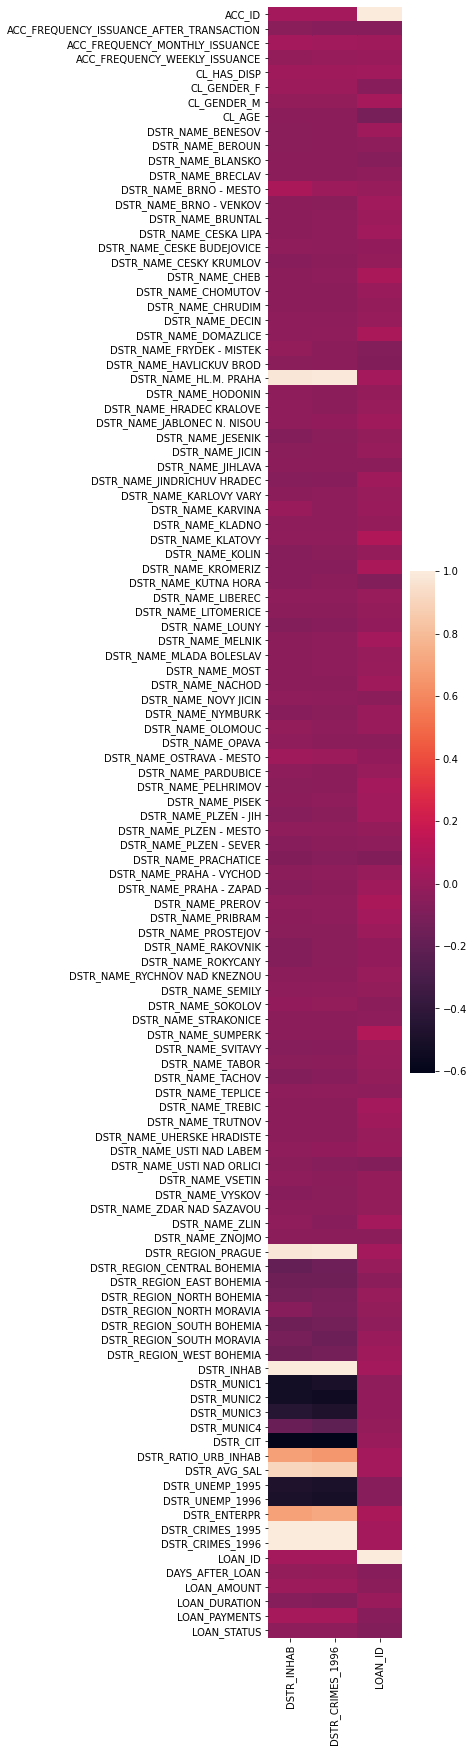

In [681]:
plt.figure(figsize=(3,30))
sns.heatmap(cor[list(intersection)])
plt.show()

In [698]:
cor_boolean = cor[intersection].abs() 
for idx, col in enumerate(cor_boolean.columns):
    x = cor_boolean.iloc[:, idx]
    correlated_features = x[x>pearson_threshold].index.tolist()
    correlated_features.remove(col)
    print(f'Feature: {col}')
    print(f'Correlated to: ')
    print(x[x>pearson_threshold], '\n')
    

Feature: DSTR_INHAB
Correlated to: 
DSTR_NAME_HL.M. PRAHA    0.975398
DSTR_REGION_PRAGUE       0.975398
DSTR_INHAB               1.000000
DSTR_AVG_SAL             0.906303
DSTR_CRIMES_1995         0.995520
DSTR_CRIMES_1996         0.994140
Name: DSTR_INHAB, dtype: float64 

Feature: DSTR_CRIMES_1996
Correlated to: 
DSTR_NAME_HL.M. PRAHA    0.990798
DSTR_REGION_PRAGUE       0.990798
DSTR_INHAB               0.994140
DSTR_AVG_SAL             0.895452
DSTR_ENTERPR             0.723175
DSTR_CRIMES_1995         0.999645
DSTR_CRIMES_1996         1.000000
Name: DSTR_CRIMES_1996, dtype: float64 

Feature: LOAN_ID
Correlated to: 
ACC_ID     0.99986
LOAN_ID    1.00000
Name: LOAN_ID, dtype: float64 



What we want to do is to ensure that none of the 'Correlated' features are found together with the 'Feature' to avoid the high correlation problem, and we want to observe this for each 'Feature'. For instance, since Pearson tells us that the feature 'LOAN_ID' is highly correlated to 'ACC_ID' as well (and wants to remove LOAN_ID for this reason), we want to make sure that these two features are not found together in the selected features. Let's check this with the currently features selected by Lasso and P-value significance:

In [692]:
print(list(selected_features))

['LOAN_AMOUNT', 'DSTR_NAME_SOKOLOV', 'LOAN_DURATION', 'LOAN_PAYMENTS', 'CL_HAS_DISP', 'DSTR_NAME_STRAKONICE', 'DSTR_CRIMES_1996', 'LOAN_ID', 'DSTR_NAME_BRUNTAL', 'ACC_ID', 'DSTR_INHAB', 'DAYS_AFTER_LOAN', 'DSTR_NAME_KARLOVY VARY']


Since DSTR_INHAB and DSTR_CRIMES_1996 are found in the selected features together, and they are highly correlated between each other, we're going to remove one of them. We're going to drop LOAN_ID as well since it's highly correlated with ACC_ID. We're preferring ACC_ID since we could join this info with other tables.

In [700]:
selected_features = list(selected_features.difference({'DSTR_INHAB', 'LOAN_ID'}))
selected_features

['LOAN_AMOUNT',
 'LOAN_PAYMENTS',
 'LOAN_DURATION',
 'DSTR_NAME_SOKOLOV',
 'CL_HAS_DISP',
 'DSTR_NAME_STRAKONICE',
 'DSTR_CRIMES_1996',
 'DSTR_NAME_BRUNTAL',
 'ACC_ID',
 'DAYS_AFTER_LOAN',
 'DSTR_NAME_KARLOVY VARY']

In [703]:
static_df_reduced = static_df[selected_features]
static_df_reduced


,LOAN_AMOUNT,LOAN_PAYMENTS,LOAN_DURATION,DSTR_NAME_SOKOLOV,CL_HAS_DISP,DSTR_NAME_STRAKONICE,DSTR_CRIMES_1996,DSTR_NAME_BRUNTAL,ACC_ID,DAYS_AFTER_LOAN,DSTR_NAME_KARLOVY VARY
client_id,,,,,,,,,,,
2,80952,3373.0,24,0,1,0,99107,0,2,313,0
25,30276,2523.0,12,0,0,0,2354,0,19,388,0
31,30276,2523.0,12,0,0,0,5887,0,25,498,0
45,318480,5308.0,60,0,0,1,1542,0,37,422,0
46,110736,2307.0,48,0,0,0,1099,0,38,254,0
...,...,...,...,...,...,...,...,...,...,...,...
13923,39168,1632.0,24,0,0,0,4846,0,11327,347,0
13924,280440,4674.0,60,0,0,0,18696,0,11328,620,0
13955,419880,6998.0,60,0,1,0,99107,0,11349,156,0


The final features to be used for this dataset are:
- ACC_ID: id of the account belonging to the client
- CL_DISP: whether the client owner shares this account with another person
- LOAN_AMOUNT: money involved in the amount (LOAN_AMOUNT = LOAN_DURATION * LOAN_PAYMENTS)
- LOAN_PAYMENTS: size of each loan single payment
- LOAN_DURATION: number of months the client has to pay the LOAN_PAYMENTS size
- DAYS_AFTER_LOAN: amount of days that passes from account creation to loan request
- DSTR_CRIMES_1996: amount of crimes happened in the year 1996 [**BIAS WARNING**]
- DSTR_NAME_SOKOLOV: clients that live in the district 'Sokolov' [**BIAS WARNING**]
- DSTR_NAME_KARLOVY_VARY: clients that live in the district 'Karlovy Vary' [**BIAS WARNING**]
- DSTR_NAME_BRUNTAL: clients that live in the district 'Bruntal' [**BIAS WARNING**]
- DSTR_NAME_STRAKONICE: clients that live in the district 'Strakonice' [**BIAS WARNING**]

In [704]:
static_df_reduced.describe()

,LOAN_AMOUNT,LOAN_PAYMENTS,LOAN_DURATION,DSTR_NAME_SOKOLOV,CL_HAS_DISP,DSTR_NAME_STRAKONICE,DSTR_CRIMES_1996,DSTR_NAME_BRUNTAL,ACC_ID,DAYS_AFTER_LOAN,DSTR_NAME_KARLOVY VARY
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,151410.175953,4190.664223,36.492669,0.001466,0.212610,0.007331,15651.299120,0.007331,5824.162757,398.240469,0.008798
std,113372.406310,2215.830344,17.075219,0.038292,0.409454,0.085372,30510.152293,0.085372,3283.512681,164.611359,0.093451
min,4980.000000,304.000000,12.000000,0.000000,0.000000,0.000000,888.000000,0.000000,2.000000,102.000000,0.000000
25%,66732.000000,2477.000000,24.000000,0.000000,0.000000,0.000000,2265.250000,0.000000,2967.000000,261.250000,0.000000
50%,116928.000000,3934.000000,36.000000,0.000000,0.000000,0.000000,3651.000000,0.000000,5738.500000,395.500000,0.000000
75%,210654.000000,5813.500000,48.000000,0.000000,0.000000,0.000000,6295.000000,0.000000,8686.000000,528.750000,0.000000
max,590820.000000,9910.000000,60.000000,1.000000,1.000000,1.000000,99107.000000,1.000000,11362.000000,697.000000,1.000000


## Dynamic data analysis

Three views include dynamic data linked to the clients, that interest specifically:
- the credit cards that clients request to the bank,
- the permanent orders that clients request to the bank,
- the transactions that clients carry out in the banking system.

We're going to analyze these views separately.


In [ ]:
dynamic_loans_and_cards_df = 

### Dynamic data analysis: loans and cards

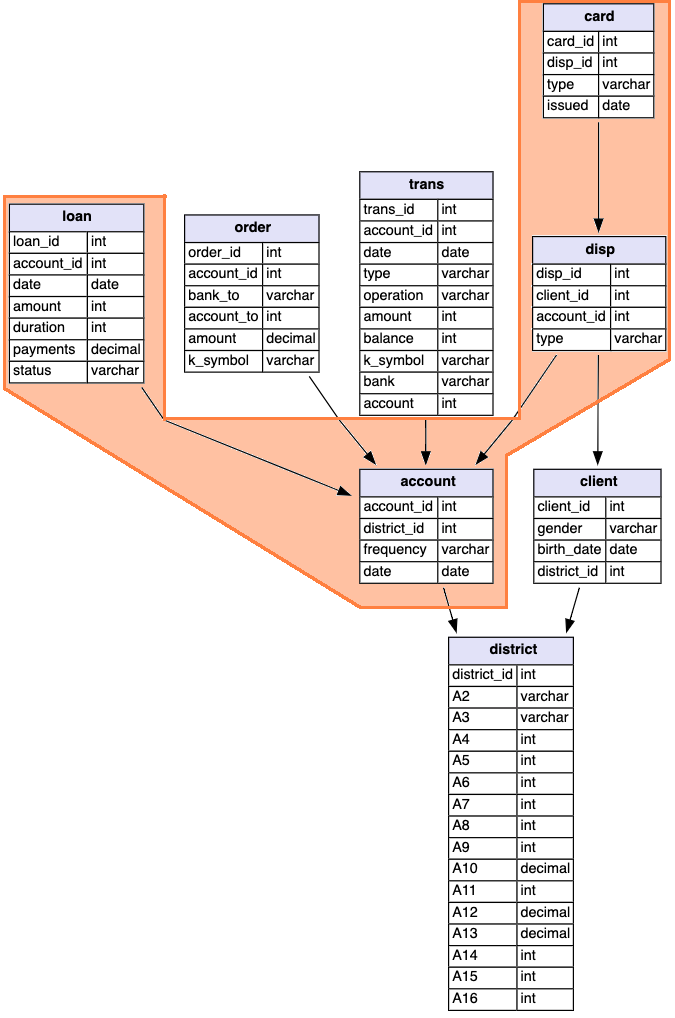

In [706]:
display(Image(filename='imgs/loan_and_cards.png'))

In [707]:
cards_df = pd.read_csv('loans_and_cards.csv', index_col='account_id')
cards_df

,card_id,disp_id,type,issued,disp_id.1,client_id,type.1,account_id.1,district_id,frequency,date,loan_id,account_id.2,date.1,amount,duration,payments,status
account_id,,,,,,,,,,,,,,,,,,
97,16,116,classic,1998-06-23,116,116,OWNER,97,74,POPLATEK MESICNE,1996-05-05,4986,97,1997-08-10,102876,12,8573.0,A
105,17,127,classic,1998-06-07,127,127,OWNER,105,21,POPLATEK MESICNE,1997-07-10,4989,105,1998-12-05,352704,48,7348.0,C
110,21,132,classic,1998-02-26,132,132,OWNER,110,36,POPLATEK MESICNE,1996-07-17,4990,110,1997-09-08,162576,36,4516.0,C
132,25,158,classic,1997-12-06,158,158,OWNER,132,40,POPLATEK PO OBRATU,1996-05-11,4996,132,1996-11-06,88440,12,7370.0,A
226,45,272,classic,1997-12-05,272,272,OWNER,226,70,POPLATEK MESICNE,1997-02-23,5015,226,1998-07-12,109344,12,9112.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11079,1230,13312,classic,1998-03-08,13312,13620,OWNER,11079,16,POPLATEK MESICNE,1995-11-10,7253,11079,1997-04-26,98304,12,8192.0,A
11138,1233,13382,classic,1996-07-06,13382,13690,OWNER,11138,70,POPLATEK TYDNE,1995-08-18,7263,11138,1996-01-19,89880,24,3745.0,A
11141,1234,13386,classic,1997-11-28,13386,13694,OWNER,11141,1,POPLATEK TYDNE,1997-02-11,7264,11141,1997-10-07,44940,12,3745.0,A
